In [1]:
!pip install konlpy
!pip install wordcloud

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


#import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from bokeh.plotting import figure
import random
from konlpy.tag import Komoran
tagger = Komoran()
from collections import Counter
from wordcloud import WordCloud
import networkx as nx
import re
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 d

In [2]:
from importlib import reload
plt=reload(plt)

plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with open('/content/drive/MyDrive/data_journalism/movie_df.xlsx',mode="rb") as excel_file:
    DF = pd.read_excel(excel_file)

In [5]:
DF

title  year  audience                 date        genre  \
0                  범죄도시 2  2022  12693023  2022-05-18 00:00:00       범죄, 액션   
1                 탑건: 매버릭  2022   8171923  2022-06-22 00:00:00           액션   
2               한산: 용의 출현  2022   7262885  2022-07-27 00:00:00      액션, 드라마   
3              공조2: 인터내셔날  2022   6948819  2022-09-07 00:00:00      액션, 코미디   
4     닥터 스트레인지: 대혼돈의 멀티버스  2022   5884600  2022-05-04 00:00:00  액션, 판타지, 모험   
...                   ...   ...       ...                  ...          ...   
4291               무림 악인전  1980     20342  1980-04-10 00:00:00           액션   
4292                   복권  1980     20307  1980-06-21 00:00:00          NaN   
4293             바다로 간 목마  1980     20041  1980-10-18 00:00:00          NaN   
4294           최인호의 병태 만세  1980     18332  1980-12-12 00:00:00          NaN   
4295                해뜨는 집  1980     17987  1980-12-06 00:00:00          NaN   

                                                  actor country  \
0           마동석(마석도), 손석구(강해상), 최귀화(전일만), 마동석, 손석구, 최귀화    대한민국   
1     톰 크루즈(매버릭), 마일즈 텔러(루스터), 제니퍼 코넬리(페니), 톰 크루즈, 마...      미국   
2     박해일(이순신), 변요한(와키자카 야스하루), 안성기(어영담), 박해일, 변요한, 안성기    대한민국   
3               현빈(림철령), 유해진(강진태), 윤아(박민영), 현빈, 유해진, 윤아    대한민국   
4     베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치...      미국   
...                                                 ...     ...   
4291                       정진화, 서영란, 장일식, 정진화, 서영란, 장일식    대한민국   
4292                       정진화, 김명아, 김기주, 정진화, 김명아, 김기주    대한민국   
4293                                 장미희, 윤일봉, 장미희, 윤일봉    대한민국   
4294                       엄인태, 이미영, 정한용, 엄인태, 이미영, 정한용    대한민국   
4295                       강주희, 이승현, 김정훈, 강주희, 이승현, 김정훈    대한민국   

              director      age  score  \
0             이상용, 이상용  15세 관람가   9.32   
1     조셉 코신스키, 조셉 코신스키  12세 관람가   9.76   
2             김한민, 김한민  12세 관람가   8.75   
3             이석훈, 이석훈  15세 관람가   8.44   
4         샘 레이미, 샘 레이미  12세 관람가   7.22   
...                ...      ...    ...   
4291      김정용, 김정용, 신고      NaN   7.00   
4292          김정용, 김정용  12세 관람가   0.00   
4293      정진우, 정진우, 신고  12세 관람가   6.29   
4294          김수형, 김수형  12세 관람가   0.00   
4295      석래명, 석래명, 신고   전체 관람가   9.44   

                                               synopsis  
0     ['가리봉동 소탕작전 후 4년 뒤,금천서 강력반은 베트남으로 도주한 용의자를 인도받...  
1     ['최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교...  
2     ['1592년 4월, 조선은 임진왜란 발발 후 단 15일 만에 왜군에 한양을 빼앗기...  
3     ['공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위...  
4     ['끝없이 균열되는 차원과 뒤엉킨 시공간의 멀티버스가 열리며오랜 동료들, 그리고 차...  
...                                                 ...  
4291  ['고구려가 요동땅을 다스릴때 막대한 황금엽전을 그곳에 매장한다. 고려왕조가 기울어...  
4292  ['이대복은 신체조건이 맞지않아 공초대사로부터 다른길을 가라는 가르침을 받고 하산한...  
4293  ['여대생 주희(장미희 분)는 11년 연상의 농아학교 교사 이민우(윤일봉 분)를 사...  
4294  ['신학기가 시작되자 철학과 강의실에 편입생 순철이 들어오므로 병태와 친숙해진다. ...  
4295  ['영아는 말괄량이로 엄마와 둘이 살아간다. 영아는 친구들과 어울려 미팅장소엘 갔다...  

[4296 rows x 11 columns]

In [6]:
DF.columns = ['title','year','audience','date','genre','actor','country','director','age','score','synopsis']
DF["title"]=DF["title"].apply(str)
DF["genre"]=DF["genre"].apply(str)
DF["actor"]=DF["actor"].apply(str)
DF["director"]=DF["director"].apply(str)
DF["age"] = DF["age"].apply(str)

In [7]:
DF['genre']=DF['genre'].replace(["멜로"],'로맨스')

In [8]:
DF[DF['year']==2022]

title  year  audience                 date         genre  \
0                범죄도시 2  2022  12693023  2022-05-18 00:00:00        범죄, 액션   
1               탑건: 매버릭  2022   8171923  2022-06-22 00:00:00            액션   
2             한산: 용의 출현  2022   7262885  2022-07-27 00:00:00       액션, 드라마   
3            공조2: 인터내셔날  2022   6948819  2022-09-07 00:00:00       액션, 코미디   
4   닥터 스트레인지: 대혼돈의 멀티버스  2022   5884600  2022-05-04 00:00:00   액션, 판타지, 모험   
..                  ...   ...       ...                  ...           ...   
95              어나더 라운드  2022     36126  2022-01-19 00:00:00           드라마   
96            배니싱: 미제사건  2022     35164  2022-03-30 00:00:00       범죄, 스릴러   
97                뒤틀린 집  2022     34886  2022-07-13 00:00:00  공포, 드라마, 스릴러   
98                   봄날  2022     34100  2022-04-27 00:00:00  드라마, 액션, 느와르   
99          아치의 노래, 정태춘  2022     33399  2022-05-18 00:00:00         다큐멘터리   

                                                actor country  \
0         마동석(마석도), 손석구(강해상), 최귀화(전일만), 마동석, 손석구, 최귀화    대한민국   
1   톰 크루즈(매버릭), 마일즈 텔러(루스터), 제니퍼 코넬리(페니), 톰 크루즈, 마...      미국   
2   박해일(이순신), 변요한(와키자카 야스하루), 안성기(어영담), 박해일, 변요한, 안성기    대한민국   
3             현빈(림철령), 유해진(강진태), 윤아(박민영), 현빈, 유해진, 윤아    대한민국   
4   베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치...      미국   
..                                                ...     ...   
95  매즈 미켈슨, 토머스 보 라센, 라르스 란데, 매즈 미켈슨, 토머스 보 라센, 라르...     덴마크   
96  유연석(박진호), 올가 쿠릴렌코(알리스 로네), 예지원(이미숙), 유연석, 올가 쿠...     프랑스   
97           서영희(명해), 김보민(희우), 김민재(현민), 서영희, 김보민, 김민재    대한민국   
98                                       손현주(호성), 손현주    대한민국   
99                         정태춘(본인), 박은옥(본인), 정태춘, 박은옥    대한민국   

                    director      age  score  \
0                   이상용, 이상용  15세 관람가   9.32   
1           조셉 코신스키, 조셉 코신스키  12세 관람가   9.76   
2                   김한민, 김한민  12세 관람가   8.75   
3                   이석훈, 이석훈  15세 관람가   8.44   
4               샘 레이미, 샘 레이미  12세 관람가   7.22   
..                       ...      ...    ...   
95  토마스 빈터베르그, 토마스 빈터베르그, 신고  15세 관람가   8.38   
96          드니 데르쿠르, 드니 데르쿠르  15세 관람가   4.05   
97                  강동헌, 강동헌  15세 관람가   4.17   
98                  이돈구, 이돈구  15세 관람가   7.56   
99                  고영재, 고영재   전체 관람가   9.35   

                                             synopsis  
0   ['가리봉동 소탕작전 후 4년 뒤,금천서 강력반은 베트남으로 도주한 용의자를 인도받...  
1   ['최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교...  
2   ['1592년 4월, 조선은 임진왜란 발발 후 단 15일 만에 왜군에 한양을 빼앗기...  
3   ['공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위...  
4   ['끝없이 균열되는 차원과 뒤엉킨 시공간의 멀티버스가 열리며오랜 동료들, 그리고 차...  
..                                                ...  
95  ['각각 역사, 체육, 음악, 심리학을 가르치는 같은 고등학교 교사 니콜라이, 마르...  
96  ['어느 날 심하게 훼손되어 신원을 알 수 없는 변사체가 발견되고사건을 맡은 형사 ...  
97  ['피치 못할 사정으로 외딴집에 이사 오게 된 가족.엄마 ‘명혜’는 이사 온 첫 날...  
98  ["한때는 잘나가던 큰형님 '호성'(손현주).8년 만에 출소해 보니 남보다 못한 동...  
99  ['10대 가수상, 가요 사전심의 철폐운동그리고 음악시장을 홀연히 떠나기까지어디서도...  

[96 rows x 11 columns]

In [9]:
DF['genre']

0            범죄, 액션
1                액션
2           액션, 드라마
3           액션, 코미디
4       액션, 판타지, 모험
           ...     
4291             액션
4292            nan
4293            nan
4294            nan
4295            nan
Name: genre, Length: 4296, dtype: object

In [10]:
# 장르 태깅(명사, 고유명사)
# 멜로와 로맨스는 항상 같이 나와서 로맨스로 통일하고 멜로를 없앰
genre_list = {}
genre_list_all = []
for i in range(0,43):
    genre_list[i] = []
    sentences = DF[DF.year==2022-i]['genre'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:  
        for word, tag in sent:
            if tag in ['NNG','NNP'] and len(word)>1 and word not in ["멜로"]:
                genre_list[i].append(word)
                genre_list_all.append(word)

In [11]:
top_genre = []
for i in range(len(Counter(genre_list_all))):
    top_genre.append(Counter(genre_list_all).most_common()[i][0])

In [12]:
top_genre

['드라마',
 '액션',
 '코미디',
 '스릴러',
 '로맨스',
 '모험',
 '범죄',
 '판타지',
 '애니메이션',
 '가족',
 '공포',
 '미스터리',
 '전쟁',
 '뮤지컬',
 '다큐멘터리',
 '느와르',
 '서부',
 '에로',
 '서스펜스',
 '서사',
 '실험',
 '무협']

# 가족영화

In [13]:
#가족 영화 

DF_family=DF[DF.genre.str.contains('가족')]
DF_family

title  year  audience                 date  \
17        신비한 동물들과 덤블도어의 비밀  2022   1195563  2022-04-13 00:00:00   
42                   수퍼 소닉2  2022    315123  2022-04-06 00:00:00   
55    극장판 엉덩이 탐정: 수플레 섬의 비밀  2022    152301  2022-05-05 00:00:00   
161               아담스 패밀리 2  2021    111348  2021-11-10 00:00:00   
171           도라에몽: 스탠바이미 2  2021     82311  2021-05-19 00:00:00   
...                     ...   ...       ...                  ...   
4217               브레이킹 어웨이  1980    167892  1980-07-17 00:00:00   
4229           삼총사 타임머신 001  1980     97700  1980-01-12 00:00:00   
4247                    삼국지  1980     63377  1980-01-16 00:00:00   
4252                독수리 5형제  1980     55968  1980-07-26 00:00:00   
4285           소년 007 은하특공대  1980     22678  1980-12-13 00:00:00   

                                genre  \
17                        판타지, 모험, 가족   
42    애니메이션, 액션, 모험, 코미디, 가족, 판타지, SF   
55                     애니메이션, 가족, 코미디   
161                    애니메이션, 코미디, 가족   
171                애니메이션, 드라마, 가족, SF   
...                               ...   
4217                     코미디, 드라마, 가족   
4229                애니메이션, 가족, 모험, SF   
4247                애니메이션, 가족, 모험, 전쟁   
4252               가족, 모험, 판타지, 애니메이션   
4285                    애니메이션, 가족, SF   

                                                  actor      country  \
17    에디 레드메인(뉴트 스캐맨더), 주드 로(알버스 덤블도어), 매즈 미켈슨(겔러트 그...           미국   
42           제임스 마스던, 짐 캐리, 벤 슈와츠, 제임스 마스던, 짐 캐리, 벤 슈와츠      미국, 캐나다   
55                                                  nan           일본   
161   오스카 아이삭(고메즈), 샤를리즈 테론(모티시아), 클로이 모레츠(웬즈데이), 오스...  미국, 영국, 캐나다   
171   윤아영(도라에몽 한국어 목소리), 김정아(진구 한국어 목소리), 김혜성(성인 진구 ...           일본   
...                                                 ...          ...   
4217  데니스 크리스토퍼, 데니스 퀘이드, 다니엘 스턴, 데니스 크리스토퍼, 데니스 퀘이드...           미국   
4229                                                nan         대한민국   
4247                                                nan         대한민국   
4252                                                nan         대한민국   
4285                                                nan         대한민국   

                                director      age  score  \
17                      데이빗 예이츠, 데이빗 예이츠  12세 관람가   6.49   
42                    제프 파울러, 제프 파울러, 신고   전체 관람가   8.23   
55                  자코 아키후미, 자코 아키후미, 신고   전체 관람가   6.72   
161       그렉 티어난, 콘래드 버논, 그렉 티어난, 콘래드 버논   전체 관람가   6.86   
171   야기 류이치, 야마자키 다카시, 야기 류이치, 야마자키 다카시   전체 관람가   8.93   
...                                  ...      ...    ...   
4217                  피터 예이츠, 피터 예이츠, 신고       PG   7.89   
4229                  임정규, 강한영, 임정규, 강한영   전체 관람가    NaN   
4247                        김청기, 김청기, 신고      nan   8.75   
4252                        이규홍, 이규홍, 신고      nan   7.67   
4285                            임정규, 임정규   전체 관람가    NaN   

                                               synopsis  
17    ['1930년대, 제2차 세계대전에 마법사들이 개입하게 되면서강력한 어둠의 마법사 ...  
42    ['도시의 악당들을 물리치며 바쁘게 지구를 지키고 있는 초특급 히어로 ‘소닉’.버섯...  
55    ['1년 내내 바람이 부는 ‘수플레 섬’에 괴도 유의 예고장이 도착했다!그의 목표는...  
161   ['평범함과는 거리가 먼 호러블리 아담스 패밀리에게 닥친 최대 위기.아이들은 사춘기...  
171   ['“할머니를 만나고 싶어!”어느 날 진구는 돌아가신 할머니와의 추억이 담긴 낡은 ...  
...                                                 ...  
4217  ["인디아나 주 블루밍튼이라는 대학 도시에 살며 채석광에서 일하는 부모님을 둔 이 ...  
4229                                               ['']  
4247  ['몰락한 한왕조의 후예인 유비는 누상촌에서 돗자리를 만들며 생활하고 있다가 황건적...  
4252                                         ['줄거리 오류']  
4285                                               ['']  

[308 rows x 11 columns]

In [14]:
# 드라마영화 시놉시스 태깅(명사)
family_synopsis_list = {}
for i in range(2022,1979,-1):
    family_synopsis_list[i] = []
    sentences = DF_family[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG'] and word not in ['시작','한편','자신','속']: #and len(word)>1
                family_synopsis_list[i].append(word)


<ipython-input-14-7abc186f036c>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_family[DF.year==i]['synopsis'].values.tolist()


In [15]:
family_synopsis_list[2021]

['거리',
 '최대',
 '위기',
 '권태',
 '가족',
 '분위기',
 '위기',
 '엄마',
 '티',
 '가족',
 '화합',
 '위해',
 '가족',
 '여행',
 '비밀',
 '여행',
 '절망',
 '상황',
 '할머니',
 '날',
 '할머니',
 '추억',
 '곰',
 '인형',
 '발견',
 '할머니',
 '마음',
 '과거',
 '소년',
 '할머니',
 '소원',
 '말씀',
 '아내',
 '미래',
 '당일',
 '신랑',
 '이',
 '동안',
 '할머니',
 '소원',
 '가족',
 '친구',
 '약속',
 '위해',
 '과거',
 '현재',
 '미래',
 '스펙터클']

In [16]:
# 리스트 틀 만들기
family_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
family_si = pd.DataFrame(family_synopsis_info)

In [17]:
family_si

Empty DataFrame
Columns: [연도, 1위 키워드, 2위 키워드, 3위 키워드, 4위 키워드, 5위 키워드, 6위 키워드, 7위 키워드, 8위 키워드, 9위 키워드, 10위 키워드]
Index: []

In [18]:
Counter(family_synopsis_list[2021]).most_common()

[('할머니', 5),
 ('가족', 4),
 ('위기', 2),
 ('위해', 2),
 ('여행', 2),
 ('과거', 2),
 ('소원', 2),
 ('미래', 2),
 ('거리', 1),
 ('최대', 1),
 ('권태', 1),
 ('분위기', 1),
 ('엄마', 1),
 ('티', 1),
 ('화합', 1),
 ('비밀', 1),
 ('절망', 1),
 ('상황', 1),
 ('날', 1),
 ('추억', 1),
 ('곰', 1),
 ('인형', 1),
 ('발견', 1),
 ('마음', 1),
 ('소년', 1),
 ('말씀', 1),
 ('아내', 1),
 ('당일', 1),
 ('신랑', 1),
 ('이', 1),
 ('동안', 1),
 ('친구', 1),
 ('약속', 1),
 ('현재', 1),
 ('스펙터클', 1)]

In [19]:
#for i in range(2022,1979,-1):
    #synopsis_data = Counter(family_synopsis_list[i]).most_common()
    #synopsis_m = sum(Counter(family_synopsis_list[i]).values())
    #new_data = {
        #"연도": str(i),
        #"1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(family_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
        #"2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(family_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
        #"3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(family_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
        #"4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(family_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
        #"5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(family_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
        #"6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(family_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
        #"7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(family_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
        #"8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(family_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
        #"9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(family_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
        #"10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(family_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
    #family_si = family_si.append(new_data,ignore_index=True)

#family_si = family_si.set_index("연도")

In [20]:
with open('/content/drive/MyDrive/data_journalism/family_si.xlsx',mode="rb") as excel_file:
    animation_si = pd.read_excel(excel_file)

In [21]:
family_si

Empty DataFrame
Columns: [연도, 1위 키워드, 2위 키워드, 3위 키워드, 4위 키워드, 5위 키워드, 6위 키워드, 7위 키워드, 8위 키워드, 9위 키워드, 10위 키워드]
Index: []

In [22]:
for i in range(2022,1979,-1):
    synopsis_m = sum(Counter(family_synopsis_list[i]).values())
    if synopsis_m ==0:
        print(i)

1981


In [23]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
year_data=[]
for i in range(2022,1981,-1):
  count_num_1 = family_synopsis_list[i].count('세계')
  count_num_2 = family_synopsis_list[i].count('가족')
  count_num_3 = family_synopsis_list[i].count('집')
  count_num_4 = family_synopsis_list[i].count('친구')
  count_num_5 = family_synopsis_list[i].count('아빠')
  count_num_6 = family_synopsis_list[i].count('아버지')
  count_num_7 = family_synopsis_list[i].count('할아버지')
  count_num_8 = family_synopsis_list[i].count('사랑')
  count_num_9 = family_synopsis_list[i].count('마을')
  count_num_10 = family_synopsis_list[i].count('엄마')
  synopsis_m = sum(Counter(family_synopsis_list[i]).values())
  word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
  word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
  word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
  word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
  word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
  word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
  word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
  word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
  word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
  word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
  year_data.append(i)


In [24]:

family_word_df_data={'year': year_data, '세계': word_count_1_data, '가족': word_count_2_data, '집' : word_count_3_data, '친구' : word_count_4_data, '아빠' : word_count_5_data, '아버지' : word_count_6_data, '할아버지' :word_count_7_data, '사랑' : word_count_8_data, '마을' : word_count_9_data, '엄마': word_count_10_data}
family_word_df = pd.DataFrame(family_word_df_data)

family_word_df

year    세계    가족     집    친구    아빠   아버지  할아버지    사랑    마을    엄마
0   2022  2.33  0.00  0.00  1.16  0.00  0.00  0.00  0.00  0.00  0.00
1   2021  0.00  8.33  0.00  2.08  0.00  0.00  0.00  0.00  0.00  2.08
2   2020  1.34  2.68  0.00  3.36  0.00  0.67  0.00  0.67  2.01  0.00
3   2019  0.60  1.19  0.60  3.57  0.60  0.60  0.00  0.00  0.60  0.60
4   2018  4.24  2.54  0.00  4.24  0.00  0.00  0.00  0.85  3.39  0.00
5   2017  0.00  0.00  0.56  3.37  0.00  0.00  0.00  1.12  0.56  0.00
6   2016  0.40  1.98  1.58  1.19  1.19  0.79  0.00  0.40  0.79  0.00
7   2015  1.89  2.52  0.00  1.89  1.26  0.63  0.00  1.26  0.63  0.00
8   2014  0.38  0.38  1.13  1.88  0.75  0.38  0.00  0.00  0.00  1.50
9   2013  0.40  2.80  0.00  2.40  1.20  0.40  2.40  0.40  0.80  1.60
10  2012  1.36  0.00  0.00  0.68  0.68  0.00  0.00  2.04  0.00  1.36
11  2011  0.00  0.43  0.87  0.87  0.00  0.00  0.87  0.43  0.87  0.87
12  2010  0.76  0.00  1.27  1.53  0.25  0.25  0.00  0.76  0.76  0.76
13  2009  4.00  0.44  0.89  2.67  0.00  0.00  0.89  0.44  0.44  0.00
14  2008  1.19  0.00  0.34  0.34  0.68  0.51  0.17  0.17  1.02  0.17
15  2007  2.43  0.19  0.75  1.12  0.00  0.37  0.00  0.00  0.00  0.00
16  2006  0.20  0.20  0.79  0.99  0.20  1.59  0.00  0.79  0.20  2.38
17  2005  1.56  0.14  0.71  1.27  0.57  0.14  0.57  0.42  0.57  0.85
18  2004  0.60  0.00  0.40  0.00  0.00  0.20  0.00  1.19  0.00  0.60
19  2003  2.48  0.00  1.86  1.24  0.62  0.00  0.00  0.62  0.00  1.24
20  2002  0.17  1.38  1.21  0.69  0.00  0.00  0.00  0.52  0.35  0.52
21  2001  1.28  0.00  0.77  0.51  0.13  0.38  0.00  0.77  0.64  0.13
22  2000  0.00  1.14  0.68  0.46  0.23  0.23  0.00  1.14  0.91  0.68
23  1999  1.49  0.50  0.25  0.74  0.00  0.74  0.00  0.00  1.74  0.00
24  1998  0.00  0.32  0.65  0.22  0.00  0.65  0.00  0.43  0.00  0.00
25  1997  0.00  0.00  0.00  0.41  0.41  0.41  0.00  0.81  0.41  2.85
26  1996  0.00  0.36  2.50  1.07  0.53  0.18  0.00  0.00  0.18  1.96
27  1995  0.22  1.35  0.45  0.90  0.00  0.67  0.00  0.67  0.90  0.00
28  1994  0.00  0.81  1.89  0.81  0.54  0.27  0.27  1.35  0.27  0.54
29  1993  0.86  0.00  0.86  0.43  0.00  0.86  0.00  0.43  0.43  0.00
30  1992  0.18  0.54  1.44  0.18  0.00  0.36  0.00  1.44  0.00  0.54
31  1991  0.69  1.38  5.86  0.69  2.07  0.00  0.00  0.69  0.00  2.41
32  1990  0.00  0.00  9.90  1.98  0.99  0.00  0.00  0.00  0.00  1.98
33  1989  1.20  0.00  3.61  1.20  0.00  1.20  0.00  0.00  6.02  0.00
34  1988  0.00  0.00  0.00  1.59  0.00  0.00  0.00  1.59  0.00  0.00
35  1987  0.00  0.00  0.00  0.00  0.00  2.33  0.00  0.00  0.00  0.00
36  1986  0.00  1.92  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
37  1985  1.98  0.00  1.98  0.99  0.00  0.99  0.99  0.99  0.00  0.00
38  1984  0.00  0.00  2.21  0.00  0.00  1.84  0.37  0.00  1.10  0.74
39  1983  4.00  0.00  0.00  1.33  0.00  0.00  0.00  0.00  0.00  0.00
40  1982  1.25  0.00  0.25  0.00  0.00  0.25  0.00  0.25  0.00  0.00

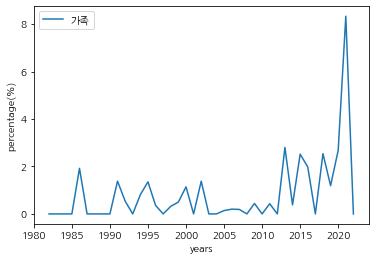

In [25]:
#세계, 가족
#plt.plot(family_word_df.year,family_word_df['세계'],label = '세계')
plt.plot(family_word_df.year,family_word_df['가족'],label = '가족')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('family_movie_family.jpeg',dpi=300)

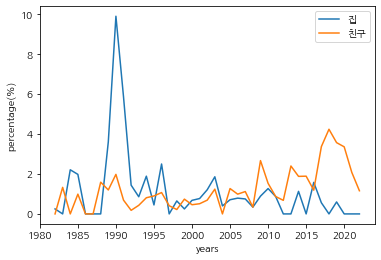

In [26]:
#집, 친구
plt.plot(family_word_df.year,family_word_df['집'],label = '집')
plt.plot(family_word_df.year,family_word_df['친구'],label = '친구')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

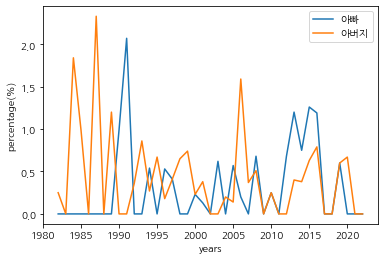

In [27]:
#아빠, 아버지
plt.plot(family_word_df.year,family_word_df['아빠'],label = '아빠')
plt.plot(family_word_df.year,family_word_df['아버지'],label = '아버지')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

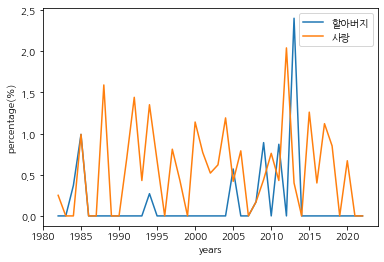

In [28]:
#할아버지, 사랑
plt.plot(family_word_df.year,family_word_df['할아버지'],label = '할아버지')
plt.plot(family_word_df.year,family_word_df['사랑'],label = '사랑')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

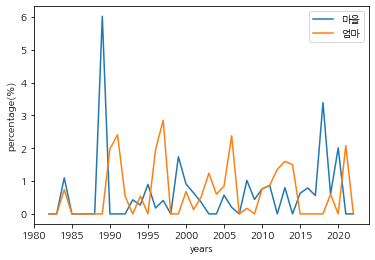

In [29]:
#마을, 엄마
plt.plot(family_word_df.year,family_word_df['마을'],label = '마을')
plt.plot(family_word_df.year,family_word_df['엄마'],label = '엄마')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

# 공포 영화

In [30]:
#공포 영화 

DF_horror=DF[DF.genre.str.contains('공포')]
DF_horror


title  year  audience                 date              genre  \
36             놉  2022    415243  2022-08-17 00:00:00           미스터리, 공포   
51    오펀: 천사의 탄생  2022    172886  2022-10-12 00:00:00            공포, 스릴러   
63          서울괴담  2022    112725  2022-04-27 00:00:00                 공포   
64           스마일  2022    103412  2022-10-06 00:00:00           미스터리, 공포   
66           블랙폰  2022     97836  2022-09-07 00:00:00            스릴러, 공포   
...          ...   ...       ...                  ...                ...   
4162    깊은 밤 갑자기  1981     28178  1981-07-17 00:00:00        공포, 범죄, 스릴러   
4190   망령의 웨딩드레스  1981     14377  1981-04-16 00:00:00            공포, 스릴러   
4219        데드 쉽  1980    164786  1980-08-07 00:00:00  모험, 공포, 미스터리, 스릴러   
4238       망령의 곡  1980     77819  1980-04-17 00:00:00                 공포   
4249       월녀의 한  1980     60319  1980-06-14 00:00:00                 공포   

                                                  actor  country  \
36         다니엘 칼루야, 케케 파머, 스티븐 연, 다니엘 칼루야, 케케 파머, 스티븐 연       미국   
51                   이사벨 퍼만, 줄리아 스타일스, 이사벨 퍼만, 줄리아 스타일스       미국   
63                         김도윤, 봉재현, 서지수, 김도윤, 봉재현, 서지수     대한민국   
64           소시 베이컨, 제시 어셔, 카일 갈너, 소시 베이컨, 제시 어셔, 카일 갈너       미국   
66     에단 호크, 메이슨 테임즈, 매들린 맥그로, 에단 호크, 메이슨 테임즈, 매들린 맥그로       미국   
...                                                 ...      ...   
4162           윤일봉(유진), 김영애(선희), 이기선(미옥), 윤일봉, 김영애, 이기선     대한민국   
4190                     정세혁, 서정아, 선우은숙, 정세혁, 서정아, 선우은숙     대한민국   
4219  조지 케네디(애쉬랜드 선장), 리차드 크레나(트레버 마샬), 닉 맨쿠소(닉), 조지...  캐나다, 영국   
4238                         지미옥, 박암, 정세혁, 지미옥, 박암, 정세혁     대한민국   
4249                         진봉진, 허진, 박병순, 진봉진, 허진, 박병순     대한민국   

                      director          age  score  \
36              조던 필, 조던 필, 신고      12세 관람가   6.77   
51    윌리엄 브렌트 벨, 윌리엄 브렌트 벨, 신고      15세 관람가   6.46   
63                홍원기, 홍원기, 신고      15세 관람가   4.17   
64              파커 핀, 파커 핀, 신고     청소년 관람불가   7.61   
66          스콧 데릭슨, 스콧 데릭슨, 신고      15세 관람가   7.66   
...                        ...          ...    ...   
4162                  고영남, 고영남     청소년 관람불가   8.94   
4190              박윤교, 박윤교, 신고     청소년 관람불가   6.88   
4219            알빈 라코프, 알빈 라코프  청소년 관람불가, R   7.37   
4238              박윤교, 박윤교, 신고      12세 관람가   8.14   
4249              김인수, 김인수, 신고      12세 관람가   7.69   

                                               synopsis  
36             ['거대하고, 주목받길 원하고, 미쳤다.나쁜 기적이라는 것도 있을까?']  
51    ['엄청난 비밀을 숨긴 사이코패스가 에스토니아의 정신병동을 탈출, 부유한 가족의 실...  
63    ['어두운 터널을 홀로 지날 때의 두려움옆집에서 들려오는 의문의 소리중고 가구에 얽...  
64    ['기괴한 미소를 지으며 자신의 눈 앞에서 목숨을 끊는 환자를 목격한 정신과 의사 ...  
66    ['사라진 아이들, 고장 난 전화기, 죽은 친구들과의 통화전화가 울리면 반드시 받을...  
...                                                 ...  
4162  ['곤충학자인 강박사(윤일봉)과 그의 아내 선희(김영애)의 집에 어느 날 19살 미...  
4190  ['신달산업 사장 김영하는 1개월전에 죽은 정임과 똑같은 마네킹을 교통사고 나게 한...  
4219  ['승객을 싣고 대서양을 횡단하던 유람선이 갑자기 나타난 정체모를 괴선과 충돌한다....  
4238  ['부호인 4대독자 김만호는 다라니라 절을 찾다. 우연히 그곳에 은신중인 고아 점례...  
4249  ['금아랑과 월녀는 약혼한 사이였는데, 이마을 제일의 세도가 이며 간악한 석탈의 딸...  

[280 rows x 11 columns]

In [31]:
# 공포영화 시놉시스 태깅(명사)
horror_synopsis_list = {}
for i in range(2022,1979,-1):
    horror_synopsis_list[i] = []
    sentences = DF_horror[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG'] and word not in ['시작','한편','자신','속']: #and len(word)>1
                horror_synopsis_list[i].append(word)

<ipython-input-31-4067859d1763>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_horror[DF.year==i]['synopsis'].values.tolist()


In [32]:
# 리스트 틀 만들기
horror_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
horror_si = pd.DataFrame(horror_synopsis_info)

In [33]:
horror_si

Empty DataFrame
Columns: [연도, 1위 키워드, 2위 키워드, 3위 키워드, 4위 키워드, 5위 키워드, 6위 키워드, 7위 키워드, 8위 키워드, 9위 키워드, 10위 키워드]
Index: []

In [34]:
#for i in range(2022,1979,-1):
    #if i ==1996:
        #synopsisis_data = Counter(horror_synopsis_list[i-1]).most_common()
        #synopsis_m = sum(Counter(horror_synopsis_list[i-1]).values())
   #else:
        #synopsis_data = Counter(horror_synopsis_list[i]).most_common()
        #synopsis_m = sum(Counter(horror_synopsis_list[i]).values())
        #ew_data = {
            #"연도": str(i),
            #"1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(horror_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
            #"2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(horror_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
            #"3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(horror_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
            #"4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(horror_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
            #"5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(horror_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
            #"6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(horror_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
            #"7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(horror_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
            #"8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(horror_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
            #"9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(horror_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
            #"10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(horror_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
        #horror_si = horror_si.append(new_data,ignore_index=True)

#horror_si = horror_si.set_index("연도")

In [35]:
with open('/content/drive/MyDrive/data_journalism/horror_si.xlsx',mode="rb") as excel_file:
    animation_si = pd.read_excel(excel_file)

In [36]:
horror_si

Empty DataFrame
Columns: [연도, 1위 키워드, 2위 키워드, 3위 키워드, 4위 키워드, 5위 키워드, 6위 키워드, 7위 키워드, 8위 키워드, 9위 키워드, 10위 키워드]
Index: []

In [37]:
#horror_si.to_excel('horror_si.xlsx')

In [38]:
#for i in range(2022,1979,-1):
  #synopsis_m = sum(Counter(horror_synopsis_list[i]).values())
  #if synopsis_m ==0:
    #print(i)

In [39]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
year_data=[]
for i in range(2022,1989,-1):
    if i == 1996:
        i=i-1
    count_num_1 = horror_synopsis_list[i].count('의문')
    count_num_2 = horror_synopsis_list[i].count('귀신')
    count_num_3 = horror_synopsis_list[i].count('친구')
    count_num_4 = horror_synopsis_list[i].count('공포')
    count_num_5 = horror_synopsis_list[i].count('집')
    count_num_6 = horror_synopsis_list[i].count('죽음')
    count_num_7 = horror_synopsis_list[i].count('마을')
    count_num_8 = horror_synopsis_list[i].count('사람')
    count_num_9 = horror_synopsis_list[i].count('딸')
    count_num_10 = horror_synopsis_list[i].count('학교')
    synopsis_m = sum(Counter(horror_synopsis_list[i]).values())
    word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
    word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
    word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
    word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
    word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
    word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
    word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
    word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
    word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
    word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
    year_data.append(i)


In [40]:

horror_word_df_data={'year': year_data, '의문': word_count_1_data, '귀신': word_count_2_data, '친구' : word_count_3_data, '공포' : word_count_4_data, '집' : word_count_5_data, '죽음' : word_count_6_data, '마을' :word_count_7_data, '사람' : word_count_8_data, '딸' : word_count_9_data, '학교': word_count_10_data}
horror_word_df = pd.DataFrame(horror_word_df_data)

horror_word_df

year    의문    귀신    친구    공포     집    죽음    마을    사람     딸    학교
0   2022  1.89  0.00  0.94  0.94  0.94  2.83  0.00  2.83  3.77  0.00
1   2021  1.36  0.45  0.45  0.91  0.45  0.91  0.45  1.36  0.00  0.91
2   2020  0.00  0.00  0.00  0.93  1.85  0.93  0.93  0.00  0.00  0.00
3   2019  0.00  0.00  0.90  0.00  1.80  0.00  0.00  1.80  2.70  0.00
4   2018  0.00  0.00  0.00  5.21  4.17  0.00  0.00  0.00  0.00  0.00
5   2017  0.00  0.00  1.98  0.99  1.98  0.99  0.99  0.00  3.96  0.00
6   2016  0.00  0.78  0.78  0.78  3.88  0.00  1.55  0.00  0.00  0.00
7   2015  0.00  0.00  0.00  0.00  0.00  1.64  9.84  1.64  0.00  0.00
8   2014  0.95  3.81  1.90  0.00  3.81  0.00  0.00  0.00  0.00  2.86
9   2013  0.00  0.58  1.17  1.17  2.92  0.00  0.58  1.17  0.00  0.00
10  2012  0.00  1.09  0.00  1.09  3.28  0.55  0.55  1.64  0.00  0.00
11  2011  2.00  0.67  0.67  2.00  1.33  6.00  0.00  1.33  0.00  0.00
12  2010  0.00  0.00  0.00  0.56  1.13  0.00  0.56  0.00  1.69  1.13
13  2009  1.06  0.00  2.83  1.06  1.77  2.83  0.71  1.06  0.35  0.71
14  2008  0.41  0.00  1.64  0.41  0.41  0.41  0.41  0.41  1.23  0.41
15  2007  0.25  0.00  0.25  0.50  1.24  1.73  0.99  0.99  0.25  0.00
16  2006  0.42  0.21  2.51  0.21  0.42  1.88  0.42  1.88  0.00  0.21
17  2005  1.02  0.20  0.81  0.61  1.83  1.22  0.20  0.61  1.42  0.61
18  2004  0.21  0.86  0.75  0.32  1.29  1.18  0.54  1.07  0.64  0.21
19  2003  0.95  0.63  0.63  0.47  1.74  1.74  0.16  1.42  0.63  0.79
20  2002  0.42  0.63  0.63  0.84  0.42  1.69  1.69  0.84  0.42  0.00
21  2001  0.00  0.00  0.00  0.42  0.42  0.63  1.68  1.47  1.05  0.21
22  2000  0.31  0.15  1.23  0.15  0.46  0.92  0.15  1.08  0.46  0.00
23  1999  1.03  0.00  0.00  0.31  0.10  1.65  0.00  1.44  0.31  0.52
24  1998  0.63  0.00  0.63  0.00  0.00  0.63  0.00  0.63  0.31  1.57
25  1997  0.39  0.00  0.00  0.39  0.00  0.77  0.39  0.77  0.39  0.00
26  1995  0.00  0.00  0.68  0.00  0.68  0.00  0.00  0.68  0.00  0.00
27  1995  0.00  0.00  0.68  0.00  0.68  0.00  0.00  0.68  0.00  0.00
28  1994  0.00  0.00  0.00  0.00  0.64  1.28  0.00  1.28  0.00  0.00
29  1993  0.00  0.00  0.54  0.00  0.00  2.16  0.00  0.00  0.00  0.00
30  1992  0.00  0.00  0.32  0.16  0.79  0.95  1.27  1.43  0.32  0.48
31  1991  0.00  1.70  0.24  0.24  1.21  0.00  0.24  0.73  0.00  0.00
32  1990  0.00  0.39  0.39  0.00  0.00  0.39  0.00  1.16  0.00  0.78

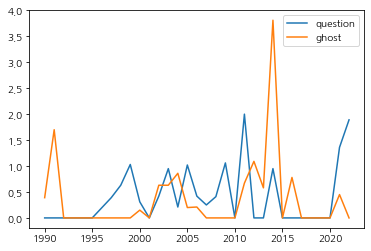

In [41]:
#의문, 귀신
plt.plot(horror_word_df.year,horror_word_df['의문'],label = 'question')
plt.plot(horror_word_df.year,horror_word_df['귀신'],label = 'ghost')
plt.legend()
plt.show()

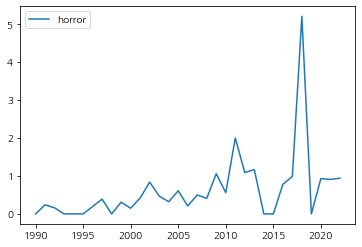

In [42]:
#친구, 공포
#plt.plot(horror_word_df.year,horror_word_df['친구'],label = 'friend')
plt.plot(horror_word_df.year,horror_word_df['공포'],label = 'horror')
plt.legend()
#plt.show()
plt.savefig('horror_keyword_horror.jpeg',dpi=300)

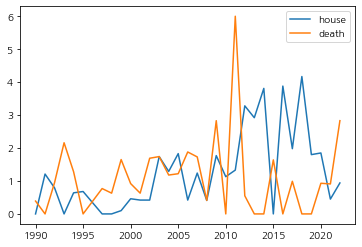

In [43]:
#집, 죽음
plt.plot(horror_word_df.year,horror_word_df['집'],label = 'house')
plt.plot(horror_word_df.year,horror_word_df['죽음'],label = 'death')
plt.legend()
plt.show()

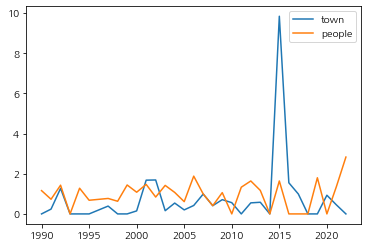

In [44]:
#마을, 사람
plt.plot(horror_word_df.year,horror_word_df['마을'],label = 'town')
plt.plot(horror_word_df.year,horror_word_df['사람'],label = 'people')
plt.legend()
plt.show()

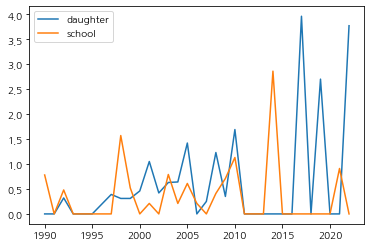

In [45]:
#딸, 학교
plt.plot(horror_word_df.year,horror_word_df['딸'],label = 'daughter')
plt.plot(horror_word_df.year,horror_word_df['학교'],label = 'school')
plt.legend()
plt.show()

# 미스터리영화

In [46]:
#미스터리 영화

DF_mystery=DF[DF.genre.str.contains('미스터리')]
DF_mystery

title  year  audience                 date              genre  \
36                놉  2022    415243  2022-08-17 00:00:00           미스터리, 공포   
46         나일 강의 죽음  2022    232883  2022-02-09 00:00:00      범죄, 드라마, 미스터리   
64              스마일  2022    103412  2022-10-06 00:00:00           미스터리, 공포   
67             안테벨룸  2022     95983  2022-02-23 00:00:00          미스터리, 스릴러   
121   컨저링3: 악마가 시켰다  2021    799261  2021-06-03 00:00:00      공포, 미스터리, 스릴러   
...             ...   ...       ...                  ...                ...   
3978       원한의 공동묘지  1983     12360  1983-06-25 00:00:00       서사, 공포, 미스터리   
3995           인사대전  1983      8862  1983-10-15 00:00:00          드라마, 미스터리   
4109        나일 살인사건  1981    203454  1981-01-01 00:00:00           범죄, 미스터리   
4219           데드 쉽  1980    164786  1980-08-07 00:00:00  모험, 공포, 미스터리, 스릴러   
4236            사망탑  1980     86712  1980-03-01 00:00:00  액션, 드라마, 미스터리, 범죄   

                                                  actor   country  \
36         다니엘 칼루야, 케케 파머, 스티븐 연, 다니엘 칼루야, 케케 파머, 스티븐 연        미국   
46                                     케네스 브래너, 케네스 브래너    미국, 영국   
64           소시 베이컨, 제시 어셔, 카일 갈너, 소시 베이컨, 제시 어셔, 카일 갈너        미국   
67             자넬 모네, 잭 휴스턴, 지나 말론, 자넬 모네, 잭 휴스턴, 지나 말론        미국   
121   베라 파미가(로레인), 패트릭 윌슨(에드), 줄리안 힐리아드(데이빗), 베라 파미가...        미국   
...                                                 ...       ...   
3978                         곽오경, 박암, 오은주, 곽오경, 박암, 오은주      대한민국   
3995                       진수경, 향운봉, 김애경, 진수경, 향운봉, 김애경      대한민국   
4109  피터 유스티노브, 제인 버킨, 로이스 차일스, 피터 유스티노브, 제인 버킨, 로이스...        영국   
4219  조지 케네디(애쉬랜드 선장), 리차드 크레나(트레버 마샬), 닉 맨쿠소(닉), 조지...   캐나다, 영국   
4236  이소룡(빌리 로[자료화면]), 김태정(김태중 (로비 로) / 빌리 로 대역), 황정...  대한민국, 홍콩   

                                    director          age  score  \
36                            조던 필, 조던 필, 신고      12세 관람가   6.77   
46                      케네스 브래너, 케네스 브래너, 신고      12세 관람가   7.39   
64                            파커 핀, 파커 핀, 신고     청소년 관람불가   7.61   
67    제라드 부시, 크리스토퍼 렌즈, 제라드 부시, 크리스토퍼 렌즈, 신고      15세 관람가   7.09   
121                         마이클 차베즈, 마이클 차베즈      15세 관람가   6.52   
...                                      ...          ...    ...   
3978                            김인수, 김인수, 신고      12세 관람가   9.17   
3995                            김선경, 김선경, 신고     청소년 관람불가   6.83   
4109                        존 길러민, 존 길러민, 신고           PG   8.24   
4219                          알빈 라코프, 알빈 라코프  청소년 관람불가, R   7.37   
4236                      오사원, 강범구, 오사원, 강범구      12세 관람가   6.67   

                                               synopsis  
36             ['거대하고, 주목받길 원하고, 미쳤다.나쁜 기적이라는 것도 있을까?']  
46    ['행복한 신혼부부를 태운 나일 강의 초호화 여객선그곳에서 끔찍한 살인 사건이 벌어...  
64    ['기괴한 미소를 지으며 자신의 눈 앞에서 목숨을 끊는 환자를 목격한 정신과 의사 ...  
67          ['그것이 당신을 지목했고,아무도 당신을 구할 수 없다.당신은 선택되었다.']  
121   ['1981년, 미국 역사상 최초로 잔혹한 살인사건의 용의자가 악마가 살해하도록 시...  
...                                                 ...  
3978  ['고려 중엽 소야를 탐한 조부자는 그녀의 남편 허준을 죽인다. 그러자 소야도 자결...  
3995  ['한국인 여자를 부인으로 둔 강사장은 홍콩에서 아파트를 지어 입주자에게 분양하려고...  
4109  ['막대한 유산을 상속받은 리넷은 재력과 돋보이는 미모를 갖춘 재원. 한편 가장 친...  
4219  ['승객을 싣고 대서양을 횡단하던 유람선이 갑자기 나타난 정체모를 괴선과 충돌한다....  
4236  ['한국 태권도의 김태중은 태권도 대회에 가는 길에 동경에 진길용을 찾는다. 진길용...  

[212 rows x 11 columns]

In [47]:
#미스터리영화 시놉시스 태깅(명사)
mystery_synopsis_list = {}
for i in range(2022,1979,-1):
    mystery_synopsis_list[i] = []
    sentences = DF_mystery[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG'] and word not in ['한편', '시작']: #and len(word)>1:
                mystery_synopsis_list[i].append(word)

<ipython-input-47-bece1530d1cd>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_mystery[DF.year==i]['synopsis'].values.tolist()


In [48]:
# 리스트 틀 만들기
mystery_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
mystery_si = pd.DataFrame(mystery_synopsis_info)

In [49]:
for i in range(2022,1979,-1):
    if sum(Counter(mystery_synopsis_list[i]).values())==0:
        print(i)

1990
1986
1982


In [50]:
#for i in range(2022,1979,-1):
    #if i in [1990,1986,1982]:
       # i=i-1
   # synopsis_data = Counter(mystery_synopsis_list[i]).most_common()
    #synopsis_m = sum(Counter(mystery_synopsis_list[i]).values())
    #new_data = {
        #"연도": str(i),
        #"1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(mystery_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
        #"2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(mystery_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
        #"3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(mystery_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
        #"4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(mystery_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
        #"5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(mystery_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
        #"6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(mystery_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
        #"7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(mystery_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
        #"8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(mystery_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
        #"9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(mystery_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
        #"10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(mystery_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
    #mystery_si = mystery_si.append(new_data,ignore_index=True)

#mystery_si = mystery_si.set_index("연도")

In [51]:
with open('/content/drive/MyDrive/data_journalism/mystery_si.xlsx',mode="rb") as excel_file:
    animation_si = pd.read_excel(excel_file)

In [52]:
mystery_si

Empty DataFrame
Columns: [연도, 1위 키워드, 2위 키워드, 3위 키워드, 4위 키워드, 5위 키워드, 6위 키워드, 7위 키워드, 8위 키워드, 9위 키워드, 10위 키워드]
Index: []

In [53]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
year_data=[]
for i in range(2022,1979,-1):
    if i in [1990,1986,1982]:
        i=i-1
    count_num_1 = mystery_synopsis_list[i].count('사건')
    count_num_2 = mystery_synopsis_list[i].count('죽음')
    count_num_3 = mystery_synopsis_list[i].count('의문')
    count_num_4 = mystery_synopsis_list[i].count('수사')
    count_num_5 = mystery_synopsis_list[i].count('사실')
    count_num_6 = mystery_synopsis_list[i].count('시체')
    count_num_7 = mystery_synopsis_list[i].count('친구')
    count_num_8 = mystery_synopsis_list[i].count('딸')
    count_num_9 = mystery_synopsis_list[i].count('여자')
    count_num_10 = mystery_synopsis_list[i].count('발견')
    synopsis_m = sum(Counter(mystery_synopsis_list[i]).values())
    word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
    word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
    word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
    word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
    word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
    word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
    word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
    word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
    word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
    word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
    year_data.append(i)

In [54]:
mystery_word_df_data={'year': year_data, '사건': word_count_1_data, '죽음': word_count_2_data, '의문' : word_count_3_data, '수사' : word_count_4_data, '사실' : word_count_5_data, '시체' : word_count_6_data, '친구' :word_count_7_data, '딸' : word_count_8_data, '여자' : word_count_9_data, '발견': word_count_10_data}
mystery_word_df = pd.DataFrame(mystery_word_df_data)

mystery_word_df

year    사건    죽음    의문    수사    사실    시체    친구     딸    여자    발견
0   2022  3.77  3.77  0.00  0.00  1.89  0.00  0.00  0.00  0.00  0.00
1   2021  1.27  1.27  0.42  0.00  0.00  0.00  0.42  0.00  0.00  0.84
2   2020  1.74  0.00  1.74  1.74  0.00  0.00  1.74  3.48  0.00  0.87
3   2019  2.94  1.96  0.98  0.00  0.00  0.00  0.00  0.98  0.00  4.90
4   2018  4.03  0.00  2.42  0.00  0.00  0.00  0.00  0.00  0.00  0.81
5   2017  2.34  2.34  0.00  0.00  1.56  0.00  0.00  3.91  0.78  0.00
6   2016  2.03  0.51  2.03  0.00  1.52  0.00  0.00  1.52  0.00  0.51
7   2015  1.14  0.00  2.27  0.00  0.00  0.00  0.00  0.00  0.00  0.00
8   2014  0.00  2.17  4.35  0.00  0.00  0.00  0.00  0.00  0.00  0.00
9   2013  4.81  0.00  0.00  0.96  0.96  0.00  0.00  0.00  0.96  0.00
10  2012  1.03  0.00  0.00  0.00  0.00  0.00  1.03  0.00  0.00  0.00
11  2011  1.95  1.46  1.46  0.49  0.00  0.00  0.49  0.00  0.00  0.49
12  2010  2.92  1.25  0.42  2.50  0.00  0.00  0.42  1.25  0.00  0.83
13  2009  4.14  0.33  0.50  0.66  0.66  0.00  0.66  0.17  0.33  1.66
14  2008  1.34  0.00  0.45  0.45  1.79  0.00  0.45  0.00  0.00  0.45
15  2007  2.27  1.24  0.62  0.41  0.62  0.00  0.00  0.00  0.21  1.24
16  2006  0.32  0.95  0.00  0.00  0.32  0.63  2.53  0.00  0.00  0.63
17  2005  2.44  0.00  1.08  2.17  0.00  0.27  0.27  0.00  0.54  1.36
18  2004  2.12  0.71  0.00  0.35  0.35  0.00  1.77  0.35  0.00  0.71
19  2003  3.09  0.31  0.00  0.62  0.31  0.31  0.00  1.23  0.62  2.16
20  2002  0.75  0.50  0.25  0.75  1.50  0.00  0.25  0.25  0.00  0.25
21  2001  3.04  0.00  0.19  0.95  1.14  0.76  0.19  0.19  0.95  1.71
22  2000  3.58  0.69  0.14  2.34  0.55  0.14  0.96  0.00  0.28  0.41
23  1999  1.24  0.74  0.50  0.37  0.87  0.00  0.62  0.87  0.74  1.49
24  1998  2.35  0.59  0.39  0.39  0.78  0.00  0.78  0.78  0.20  0.20
25  1997  1.41  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
26  1996  0.79  0.26  0.26  0.53  1.05  0.53  0.00  0.00  0.26  1.05
27  1995  0.87  0.43  0.00  0.87  0.00  0.43  0.00  2.17  0.43  1.30
28  1994  3.33  0.00  0.00  0.24  0.71  0.48  0.24  0.00  0.95  0.24
29  1993  1.95  0.65  0.00  0.65  0.16  0.00  0.16  0.00  1.30  1.14
30  1992  6.77  0.00  0.00  0.00  2.46  0.00  0.62  0.00  0.00  1.54
31  1991  3.33  0.83  0.00  0.00  1.67  0.00  0.83  0.83  0.00  0.00
32  1989  2.86  0.48  0.00  2.38  0.95  1.43  0.00  0.00  0.00  3.33
33  1989  2.86  0.48  0.00  2.38  0.95  1.43  0.00  0.00  0.00  3.33
34  1988  0.00  0.00  4.55  0.00  0.00  0.00  4.55  0.00  4.55  9.09
35  1987  2.63  0.00  0.00  0.00  0.66  0.00  0.00  0.00  0.66  0.00
36  1985  4.65  1.16  0.00  0.00  0.00  1.16  1.16  3.49  0.00  0.00
37  1985  4.65  1.16  0.00  0.00  0.00  1.16  1.16  3.49  0.00  0.00
38  1984  1.89  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
39  1983  0.59  0.59  0.00  0.00  0.00  0.00  0.00  0.59  1.18  0.00
40  1981  1.67  0.00  0.00  1.67  0.00  0.00  1.67  0.00  0.00  0.00
41  1981  1.67  0.00  0.00  1.67  0.00  0.00  1.67  0.00  0.00  0.00
42  1980  1.30  2.60  1.30  0.00  0.00  0.00  0.00  0.00  0.00  2.60

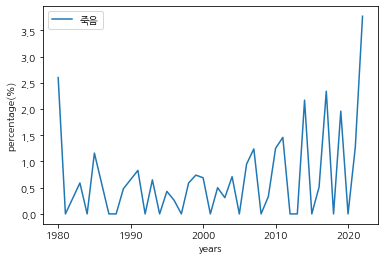

In [55]:
#사건, 죽음
#plt.plot(mystery_word_df.year,mystery_word_df['사건'],label = '사건')
plt.plot(mystery_word_df.year,mystery_word_df['죽음'],label = '죽음')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('mystery_keyword_death.jpeg',dpi=300)

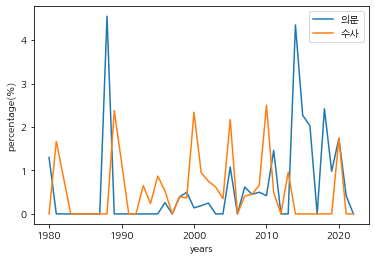

In [56]:
#의문, 수사
plt.plot(mystery_word_df.year,mystery_word_df['의문'],label = '의문')
plt.plot(mystery_word_df.year,mystery_word_df['수사'],label = '수사')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

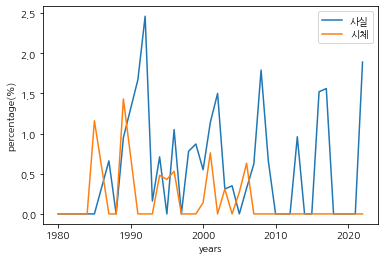

In [57]:
#사실, 시체
plt.plot(mystery_word_df.year,mystery_word_df['사실'],label = '사실')
plt.plot(mystery_word_df.year,mystery_word_df['시체'],label = '시체')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

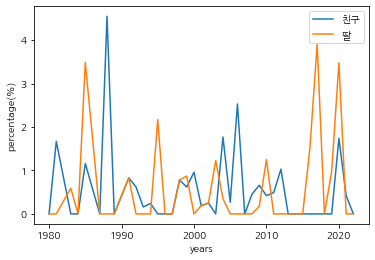

In [58]:
#친구, 딸
plt.plot(mystery_word_df.year,mystery_word_df['친구'],label = '친구')
plt.plot(mystery_word_df.year,mystery_word_df['딸'],label = '딸')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

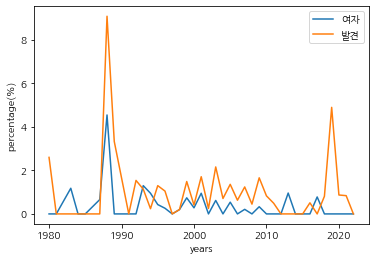

In [59]:
#여자, 발견
plt.plot(mystery_word_df.year,mystery_word_df['여자'],label = '여자')
plt.plot(mystery_word_df.year,mystery_word_df['발견'],label = '발견')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()